# AI Lab-6
## Regression, feature selection and PCA
### Author : Abdul Basit

#### Lab Tasks

> 1. Load and define briefly the diabetes dataset available in sklearn.
> 2. Write brief summary about Diabetes Dataset
> 3. Print, Check and define keys and shape of diabetes dataset.
> 4. Split the dataset into train and test.
> 5. Fit the model on test data and compute accuracy using Linear Regression.
> 6. Make slots of features on data set and evaluate using regression metrics.
> 7. Apply PCA and analyze the results with results without PCA.
> 8. Apply permutation importance function and plot feature importances.

In [2]:
# importing all necessary libraries
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import sklearn as sk

## Brief Description of the diabetes dataset

This dataset contains information of diabetes patients information containing different features. We will use this dataset to predict whether a patient has diabetes  or not by training a model using this dataset.

## Importing diabetes data set

In [3]:
dib = datasets.load_diabetes()

Keys of the dataset

In [3]:
a = dib.keys()
a

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])

In [4]:
d_data = dib.data
# storing data in a variable


In [5]:
dib.data.shape

(442, 10)

In [6]:
# printing all the keys availible in the dataset
for i in a:
    print (dib[i])
    print('\n')

[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990842
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06832974
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286377
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04687948
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452837
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00421986
   0.00306441]]


[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150. 279.
  92.  83

# Separating the features and labels

In [7]:
features = dib.data
labels = dib.target
features.shape, labels.shape

((442, 10), (442,))

## Converting data from arrays to give it a better look:


In [8]:
df_dib = pd.DataFrame(features, columns = dib.feature_names)
df_dib['Values'] = dib.target
df_dib.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Values
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [9]:
# X is features and Y is labels
X = df_dib.loc[:,df_dib.columns!='Values']
Y = df_dib.Values

X,Y

(          age       sex       bmi        bp        s1        s2        s3  \
 0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
 1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
 2    0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
 3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
 4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
 ..        ...       ...       ...       ...       ...       ...       ...   
 437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
 438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
 439  0.041708  0.050680 -0.015906  0.017282 -0.037344 -0.013840 -0.024993   
 440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
 441 -0.045472 -0.044642 -0.073030 -0.081414  0.083740  0.027809  0.173816   
 
            s4        s5        s6  
 0   -0.002592  0.019908 

## Spliting and data for taining the model

In [10]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y,test_size = 0.25 , shuffle = True)
Xtrain.shape, Ytest.shape, Xtest.shape, Ytest.shape

((331, 10), (111,), (111, 10), (111,))

# Fitting the model using linear regression 

In [11]:
from sklearn.linear_model import LinearRegression
LinReg = LinearRegression()

In [12]:
LinReg.fit(Xtrain,Ytrain)

LinearRegression()

In [13]:
Acc = LinReg.score(Xtest,Ytest)
Acc

0.5692318246192714

# Selecting a feature from the dataset:

In [14]:
dXtest = pd.DataFrame(Xtest,columns = dib.feature_names)
dXtrain = pd.DataFrame(Xtrain, columns = dib.feature_names)
dXtest = dXtest[['age']]
dXtrain = dXtrain[['sex']]

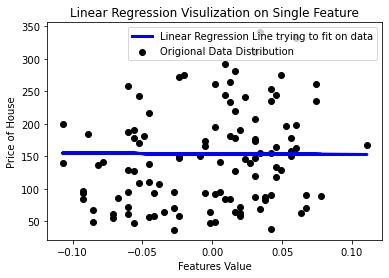

In [15]:
LinReg.fit(dXtrain,Ytrain)

plt.xlabel('Features Value')
plt.ylabel('Price of House')
plt.title('Linear Regression Visulization on Single Feature')
plt.scatter(dXtest, Ytest, color = 'black', label = 'Origional Data Distribution')
plt.plot(dXtest, LinReg.predict(dXtest),color= 'blue',linewidth = 3, label = 'Linear Regression Line trying to fit on data')
plt.legend(loc = 'upper right')

##  Making slots of features on data set and evaluating slots using regression metrics

In [16]:
s1xtr = Xtrain[['age','sex','bmi']]
s2xtr = Xtrain[['s1','s2','s3']]
s3xtr = Xtrain[['s3','s4','s6']]
s4xtr = Xtrain[['bp','s5','s6','age']]

s1xts = Xtest[['age','sex','bmi']]
s2xts = Xtest[['s1','s2','s3']]
s3xts = Xtest[['s3','s4','s6']]
s4xts = Xtest[['bp','s5','s6','age']]


# Fitting and evaluating on all slot:


In [17]:
LinReg.fit(s1xtr,Ytrain)
LinReg.score(s1xts,Ytest)

0.3967001216378194

In [18]:
LinReg.fit(s2xtr,Ytrain)
LinReg.score(s2xts,Ytest)

0.298897478084031

In [19]:
LinReg.fit(s3xtr,Ytrain)
LinReg.score(s3xts,Ytest)

0.3258012438489031

In [20]:
LinReg.fit(s4xtr,Ytrain)
LinReg.score(s4xts,Ytest)

0.36680795778711583

# Calculating all metrics for all slots using linear regression

In [21]:
from sklearn.metrics import mean_absolute_error, explained_variance_score, mean_squared_error
LinReg.fit(s1xtr, Ytrain)
print('Mean Absolute Error of slot 1:',mean_absolute_error(Ytest,LinReg.predict(s1xts)))
print('Mean Squared Error of slot 1:',mean_squared_error(Ytest,LinReg.predict(s1xts)))
print('Explained Variance Score of slot 1:',explained_variance_score(Ytest,LinReg.predict(s1xts)))


Mean Absolute Error of slot 1: 47.29151356120441
Mean Squared Error of slot 1: 3281.3412322530576
Explained Variance Score of slot 1: 0.397757265689735


In [22]:
LinReg.fit(s2xtr, Ytrain)
print('Mean Absolute Error of slot 2:',mean_absolute_error(Ytest,LinReg.predict(s2xts)))
print('Mean Squared Error of slot 2:',mean_squared_error(Ytest,LinReg.predict(s2xts)))
print('Explained Variance Score of slot 2:',explained_variance_score(Ytest,LinReg.predict(s2xts)))


Mean Absolute Error of slot 2: 48.56015000524337
Mean Squared Error of slot 2: 3813.2887071765213
Explained Variance Score of slot 2: 0.3118015894096079


In [23]:
LinReg.fit(s3xtr, Ytrain)
print('Mean Absolute Error of slot 3:',mean_absolute_error(Ytest,LinReg.predict(s3xts)))
print('Mean Squared Error of slot 3:',mean_squared_error(Ytest,LinReg.predict(s3xts)))
print('Explained Variance Score of slot 3:',explained_variance_score(Ytest,LinReg.predict(s3xts)))


Mean Absolute Error of slot 3: 50.21955707525066
Mean Squared Error of slot 3: 3666.95942869761
Explained Variance Score of slot 3: 0.33028367806094094


In [24]:
LinReg.fit(s4xtr, Ytrain)
print('Mean Absolute Error of slot 4:',mean_absolute_error(Ytest,LinReg.predict(s4xts)))
print('Mean Squared Error of slot 4:',mean_squared_error(Ytest,LinReg.predict(s4xts)))
print('Explained Variance Score of slot 4:',explained_variance_score(Ytest,LinReg.predict(s4xts)))


Mean Absolute Error of slot 4: 47.617970272583385
Mean Squared Error of slot 4: 3443.924374207039
Explained Variance Score of slot 4: 0.38021980333444505


## Calculating all metrics for test dataset containing all features

In [25]:
LinReg.fit(Xtrain, Ytrain)
print('Mean Absolute Error:',mean_absolute_error(Ytest,LinReg.predict(Xtest)))
print('Mean Squared Error:',mean_squared_error(Ytest,LinReg.predict(Xtest)))
print('Explained Variance Score:',explained_variance_score(Ytest,LinReg.predict(Xtest)))


Mean Absolute Error: 39.51435420248582
Mean Squared Error: 2342.943246162289
Explained Variance Score: 0.5732793759658055


# Principal Components Analysis (PCA)

In [26]:
# Model Accuracy is 
Acc

0.5692318246192714

In [27]:
pca = PCA(n_components = 6)
pca.fit(d_data)
pca.explained_variance_ratio_

array([0.40242142, 0.14923182, 0.12059623, 0.09554764, 0.06621856,
       0.06027192])

In [28]:
pca = PCA(n_components = 9)
trX = pca.fit_transform(Xtrain)
tsX = pca.transform(Xtest)
trX

array([[ 0.09216216, -0.11595056,  0.02736829, ..., -0.02323351,
        -0.0471465 , -0.0071772 ],
       [-0.05926455,  0.08905065,  0.04431324, ...,  0.009804  ,
        -0.00163412,  0.0023565 ],
       [ 0.04618835,  0.04908755,  0.04956439, ...,  0.03436766,
        -0.01863   , -0.00886177],
       ...,
       [-0.02612183, -0.03821258, -0.04440043, ..., -0.00821093,
        -0.01883049, -0.00698608],
       [ 0.02921133,  0.00890669,  0.02521147, ..., -0.00263084,
         0.03012736,  0.00156455],
       [-0.03726016, -0.0590259 ,  0.0370359 , ..., -0.02569716,
         0.07953146,  0.00063199]])

In [29]:
#printing shape of the transformed data
trX.shape, tsX.shape

((331, 9), (111, 9))

In [30]:
LinReg.fit(X,Y)
X.shape,Y.shape

((442, 10), (442,))

## Inspecting the feature importance using sklearn


In [31]:
from sklearn.inspection import permutation_importance
results = permutation_importance(LinReg,X,Y,n_repeats = 10, random_state = 0)
for i in results.importances_mean.argsort():
    print('Features', X.columns[i], ' : " " has importance ', results.importances_mean[i])

Features age  : " " has importance  -5.384337814051676e-05
Features s6  : " " has importance  0.0038332064465688154
Features s3  : " " has importance  0.008005487164689195
Features s4  : " " has importance  0.021860906407610337
Features sex  : " " has importance  0.03829235428971102
Features bp  : " " has importance  0.07736720233708085
Features s2  : " " has importance  0.1717489100956951
Features bmi  : " " has importance  0.20773214756220043
Features s5  : " " has importance  0.4086523585305163
Features s1  : " " has importance  0.491844958264975


([<matplotlib.axis.XTick at 0x7fa869163510>,
 [Text(0, 0, 'age'),
  Text(0, 0, 's6'),
  Text(0, 0, 's3'),
  Text(0, 0, 's4'),
  Text(0, 0, 'sex'),
  Text(0, 0, 'bp'),
  Text(0, 0, 's2'),
  Text(0, 0, 'bmi'),
  Text(0, 0, 's5'),
  Text(0, 0, 's1')])

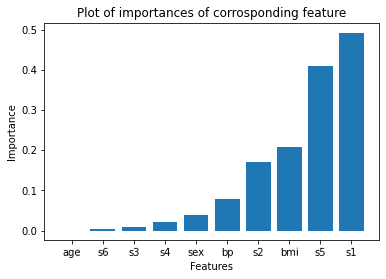

In [32]:
feature = []
importances = []

for i in results.importances_mean.argsort():
    feature.append(i)
    importances.append(results.importances_mean[i])
    
    
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Plot of importances of corrosponding feature')
plt.bar(range(len(importances)),importances, align = 'center')
plt.xticks(range(len(feature)),X.columns[feature],rotation = 1)